In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# reading data from the file
df=pd.read_table("breast-cancer-wisconsin.data",sep=',')

In [3]:
df.head()

,ID,clump_thickness,uniformity_cellsize,uniformity_cellshape,marginal_adhesion,single_epithelial_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          699 non-null    int64 
 1   clump_thickness             699 non-null    int64 
 2   uniformity_cellsize         699 non-null    int64 
 3   uniformity_cellshape        699 non-null    int64 
 4   marginal_adhesion           699 non-null    int64 
 5   single_epithelial_cellsize  699 non-null    int64 
 6   bare_nuclei                 699 non-null    object
 7   bland_chromatin             699 non-null    int64 
 8   normal_nucleoli             699 non-null    int64 
 9   mitoses                     699 non-null    int64 
 10  class                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
#replace column having '?' with 'None'
df['bare_nuclei']=df['bare_nuclei'].replace('?', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          699 non-null    int64 
 1   clump_thickness             699 non-null    int64 
 2   uniformity_cellsize         699 non-null    int64 
 3   uniformity_cellshape        699 non-null    int64 
 4   marginal_adhesion           699 non-null    int64 
 5   single_epithelial_cellsize  699 non-null    int64 
 6   bare_nuclei                 683 non-null    object
 7   bland_chromatin             699 non-null    int64 
 8   normal_nucleoli             699 non-null    int64 
 9   mitoses                     699 non-null    int64 
 10  class                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
print(df[df.isnull().any(axis=1)])

          ID  clump_thickness  uniformity_cellsize  uniformity_cellshape  \
23   1057013                8                    4                     5   
40   1096800                6                    6                     6   
139  1183246                1                    1                     1   
145  1184840                1                    1                     3   
158  1193683                1                    1                     2   
164  1197510                5                    1                     1   
235  1241232                3                    1                     4   
249   169356                3                    1                     1   
275   432809                3                    1                     3   
292   563649                8                    8                     8   
294   606140                1                    1                     1   
297    61634                5                    4                     3   
315   704168

In [8]:
df.loc[[23]]

,ID,clump_thickness,uniformity_cellsize,uniformity_cellshape,marginal_adhesion,single_epithelial_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,None,7,3,1,4


In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          683 non-null    int64 
 1   clump_thickness             683 non-null    int64 
 2   uniformity_cellsize         683 non-null    int64 
 3   uniformity_cellshape        683 non-null    int64 
 4   marginal_adhesion           683 non-null    int64 
 5   single_epithelial_cellsize  683 non-null    int64 
 6   bare_nuclei                 683 non-null    object
 7   bland_chromatin             683 non-null    int64 
 8   normal_nucleoli             683 non-null    int64 
 9   mitoses                     683 non-null    int64 
 10  class                       683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [11]:
df['class'].value_counts()

2    444
4    239
Name: class, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,10]=labelencoder_Y.fit_transform(df.iloc[:,10].values)

In [13]:
df.iloc[23]

ID                            1059552
clump_thickness                     1
uniformity_cellsize                 1
uniformity_cellshape                1
marginal_adhesion                   1
single_epithelial_cellsize          2
bare_nuclei                         1
bland_chromatin                     3
normal_nucleoli                     1
mitoses                             1
class                               0
Name: 24, dtype: object

In [40]:
df['class'].value_counts()

0    444
1    239
Name: class, dtype: int64

<AxesSubplot:>

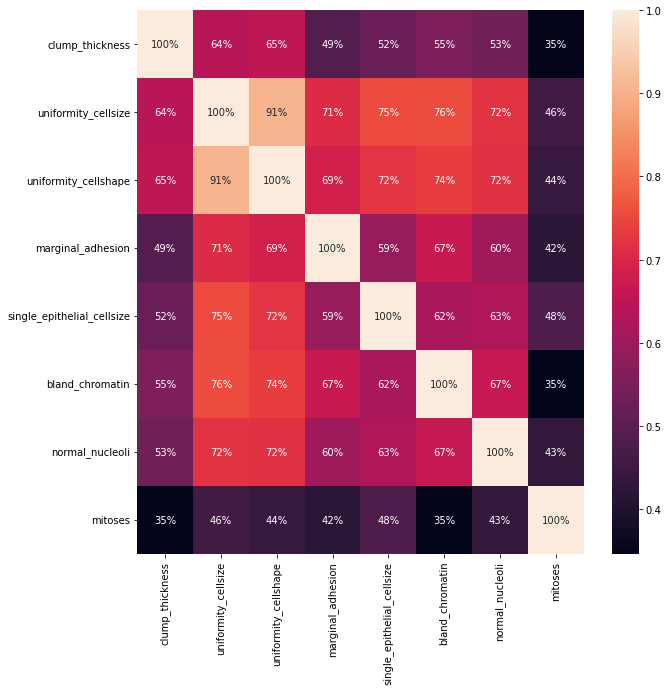

In [14]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True,fmt=".0%")

In [15]:
Y= df['class']
 #Load X Variables into a Pandas Dataframe with columns 
X = df.drop(['class'], axis = 1)
X=X.drop(['ID'],axis=1)

In [16]:
X

,clump_thickness,uniformity_cellsize,uniformity_cellshape,marginal_adhesion,single_epithelial_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 683, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [19]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)


In [20]:
mutual_info

array([0.29437192, 0.45526962, 0.45399358, 0.3211632 , 0.40884009,
       0.41109518, 0.39586976, 0.36110442, 0.14343914])

In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index =X_train.columns
mutual_info.sort_values(ascending=False)

uniformity_cellsize           0.455270
uniformity_cellshape          0.453994
bare_nuclei                   0.411095
single_epithelial_cellsize    0.408840
bland_chromatin               0.395870
normal_nucleoli               0.361104
marginal_adhesion             0.321163
clump_thickness               0.294372
mitoses                       0.143439
dtype: float64

<AxesSubplot:>

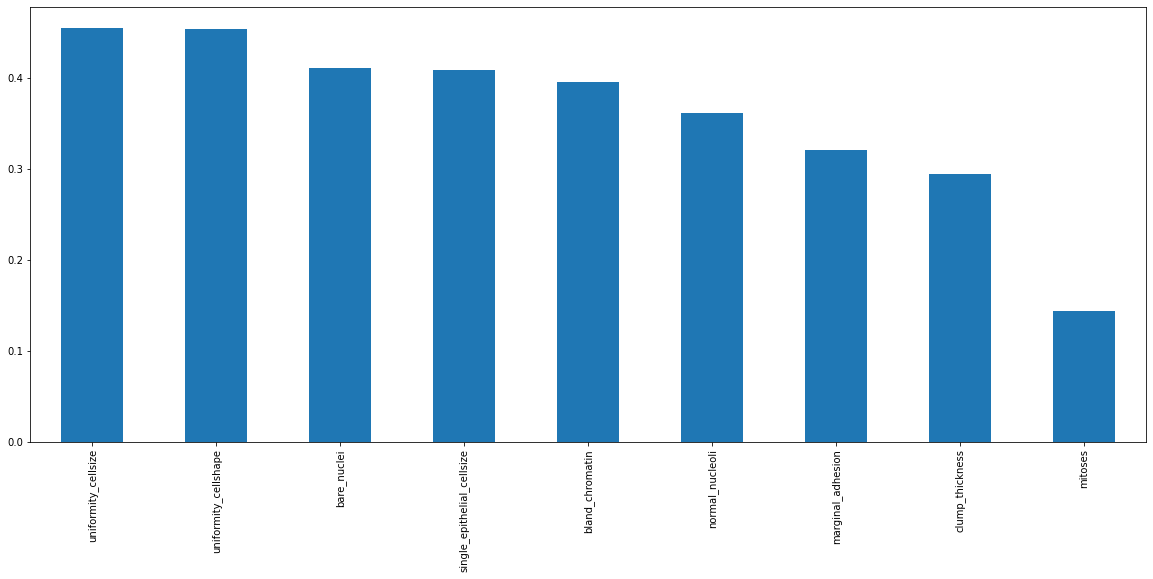

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [23]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k=8)
sel_cols.fit(X_train, Y_train)
X_train.columns[sel_cols.get_support()]

Index(['clump_thickness', 'uniformity_cellsize', 'uniformity_cellshape',
       'marginal_adhesion', 'single_epithelial_cellsize', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli'],
      dtype='object')

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [25]:
X_train=X_train.drop(['mitoses'],axis=1)
# X=X.drop(['marginal_adhesion'],axis=1) 

In [26]:
# # choose k between 1 to 31
# k_range = range(1, 10)
# k_scores = []
# # use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # X,Y will automatically divided by 10 folder
#     scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
# # plot to see clearly
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()

In [27]:
# knn = KNeighborsClassifier(n_neighbors=5)
# scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
# # print all 10 times scores 
# print(scores)
# print(scores.mean())


In [28]:
models= []
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
#     kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For DT Model:Mean accuracy is 0.952458 (Std accuracy is 0.028517)
For SVM Model:Mean accuracy is 0.968889 (Std accuracy is 0.021700)
For NB Model:Mean accuracy is 0.968889 (Std accuracy is 0.021700)
For KNN Model:Mean accuracy is 0.970707 (Std accuracy is 0.016681)


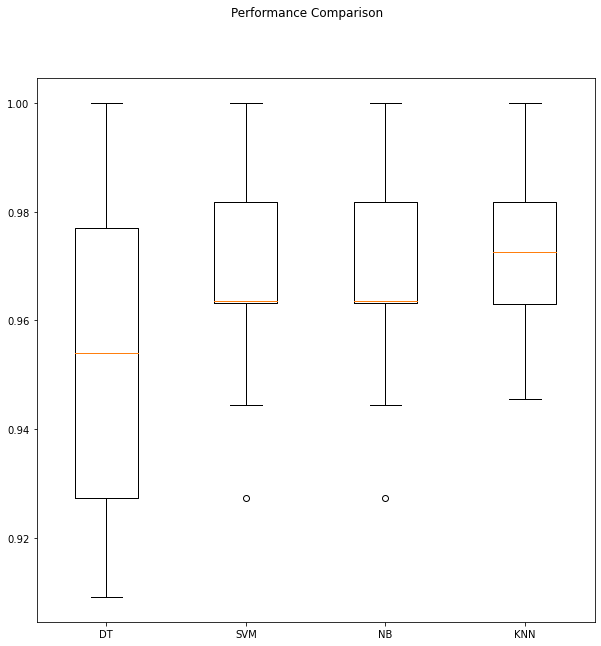

In [29]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [33]:
X_test=X_test.drop(['mitoses'],axis=1)

In [34]:
for name, model in models:
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    model.fit(X_train_scaled, Y_train)
    X_test_scaled = scaler.transform(X_test)
    predictions = model.predict(X_test_scaled)
    print("\nModel:",name)
    print("Accuracy score:" % accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    print("Confusion Matrix:\n",confusion_matrix(Y_test, predictions))


Model: DT
Accuracy score:
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        87
           1       0.89      0.98      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
 [[81  6]
 [ 1 49]]

Model: SVM
Accuracy score:
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        87
           1       0.91      0.96      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
 [[82  5]
 [ 2 48]]

Model: NB
Accuracy score:
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        87
       

In [43]:
clf=KNeighborsClassifier()
clf.fit(X_train.values,Y_train.values)
predict = clf.predict(X_test.values)

In [44]:
example_measures = [[4,2,1,1,1,2,3,2]]
prediction = clf.predict(example_measures)
print(prediction)

[0]


In [39]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        87
           1       0.94      0.96      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Confusion matrix, without normalization
[[84  3]
 [ 2 48]]


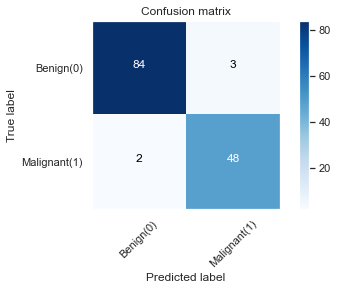

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[0,1])
np.set_printoptions(precision=2) 

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix')

In [46]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2]]))

[0]
